In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
#Leemos el dataframe 
df_milan = pd.read_csv('ValoresAtipicosMilan.csv', index_col="id")
df_milan.head(3)

,last_scraped,name,host_id,host_name,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,,,,,,,,,,,,,,,,,,,,,
6400,2024-09-17,The Studio Milan,13822,Francesca,2009-04-17,Unknown,f,f,"Milan, Lombardy, Italy",TIBALDI,...,5.00,5.00,5.00,5.00,4.56,4.67,1.0,0.0,1.0,0.0
23986,2024-09-17,""" Characteristic Milanese flat""",95941,Jeremy,2010-03-19,within an hour,f,t,Milan,NAVIGLI,...,4.67,4.22,4.59,4.74,4.70,4.48,1.0,1.0,0.0,0.0
40470,2024-09-17,Giacinto Cosy & clean flat near MM1,174203,Giacinto,2010-07-20,within an hour,f,t,Milan,VIALE MONZA,...,4.71,4.83,4.98,4.88,4.44,4.51,2.0,2.0,0.0,0.0


In [230]:
# Si hay valores no mapeados, remplázalos por 0 (o 1, dependiendo del contexto)
df_milan['host_is_superhost'] = df_milan['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df_milan['instant_bookable'] = df_milan['instant_bookable'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df_milan['has_availability'] = df_milan['has_availability'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df_milan['host_identity_verified'] = df_milan['host_identity_verified'].map({'t': 1, 'f': 0}).fillna(0).astype(int)

df_milan['room_type'] = df_milan['room_type'].map({
    'Entire home/apt':1,
    'Private room':2,
    'Hotel room':3,
    'Shared room':4
}).fillna(0).astype(int)

df_milan['property_type'] = df_milan['property_type'].map({
    'Private room in rental unit': 0,
    'Entire rental unit': 1,
    'Private room in loft': 2,
    'Entire loft': 3,
    'Entire condo': 4,
    'Private room in condo': 5,
    'Shared room in rental unit': 6,
    'Entire villa': 7,
    'Entire home': 8,
    'Private room in bed and breakfast': 9,
    'Private room in home': 10,
    'Entire vacation home': 11,
    'Private room in guest suite': 12,
    'Entire serviced apartment': 13,
    'Room in boutique hotel': 14,
    'Shared room in condo': 15,
    'Private room in villa': 16,
    'Entire place': 17,
    'Casa particular': 18,
    'Room in aparthotel': 19,
    'Entire guest suite': 20,
    'Entire townhouse': 21,
    'Private room in guesthouse': 22,
    'Private room in townhouse': 23,
    'Private room in camper/rv': 24,
    'Private room': 25,
    'Tiny home': 26,
    'Shared room in hostel': 27,
    'Private room in hostel': 28,
    'Shared room in home': 29,
    'Private room in cave': 30,
    'Private room in vacation home': 31,
    'Room in hostel': 32,
    'Entire chalet': 33,
    'Private room in serviced apartment': 34,
    'Private room in farm stay': 35,
    'Private room in nature lodge': 36,
    'Room in bed and breakfast': 37,
    'Entire guesthouse': 38,
    'Shared room in loft': 39,
    'Room in hotel': 40,
    'Room in serviced apartment': 41,
    'Private room in tiny home': 42,
    'Entire home/apt': 43,
    'Private room in casa particular': 44,
    'Boat': 45,
    'Shared room in bed and breakfast': 46,
    'Camper/RV': 47,
    'Private room in minsu': 48,
    'Shared room in guesthouse': 49,
    'Shared room in hotel': 50,
    'Shipping container': 51
}).fillna(-1).astype(int)
df_milan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23705 entries, 6400 to 1247058921429251974
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  23705 non-null  object 
 1   name                                          23705 non-null  object 
 2   host_id                                       23705 non-null  int64  
 3   host_name                                     23705 non-null  object 
 4   host_since                                    23705 non-null  object 
 5   host_response_time                            23705 non-null  object 
 6   host_is_superhost                             23705 non-null  int32  
 7   host_identity_verified                        23705 non-null  int32  
 8   neighbourhood                                 23705 non-null  object 
 9   neighbourhood_cleansed                        237

In [231]:
# Filtrar solo las columnas numéricas (int y float)
df_milan = df_milan.select_dtypes(include=['int64', 'float64', 'int32'])
df_milan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23705 entries, 6400 to 1247058921429251974
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       23705 non-null  int64  
 1   host_is_superhost                             23705 non-null  int32  
 2   host_identity_verified                        23705 non-null  int32  
 3   latitude                                      23705 non-null  float64
 4   longitude                                     23705 non-null  float64
 5   property_type                                 23705 non-null  int32  
 6   room_type                                     23705 non-null  int32  
 7   has_availability                              23705 non-null  int32  
 8   instant_bookable                              23705 non-null  int32  
 9   host_response_rate                            237

**host_acceptance_rate**

In [232]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_milan[['instant_bookable', 'host_is_superhost']]
Var_Dep= df_milan['host_acceptance_rate']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [233]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable', 'host_is_superhost'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.15293085, 0.0693417 ]),
 'rank_': 2,
 'singular_': array([76.94480273, 68.75844089]),
 'intercept_': 0.8097894721158923}

In [234]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=df_milan[['instant_bookable', 'host_is_superhost']])
y_pred

array([0.80978947, 0.80978947, 0.80978947, ..., 1.03206202, 1.03206202,
       1.03206202])

In [235]:
#Insertamos la columna de predicciones en el DataFrame
df_milan.insert(0, 'Predicciones', y_pred)


<Axes: xlabel='instant_bookable', ylabel='host_acceptance_rate'>

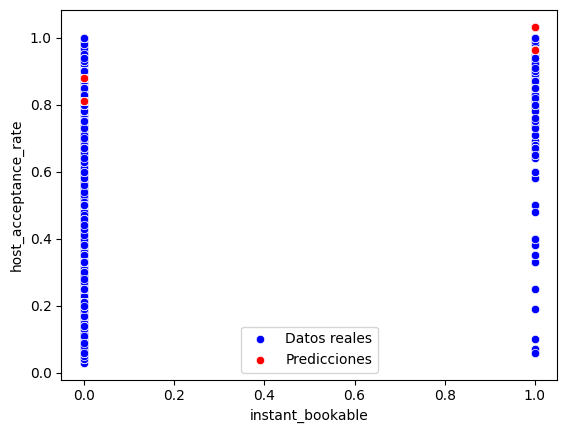

In [236]:
sns.scatterplot(x='instant_bookable', y='host_acceptance_rate', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=df_milan, label='Predicciones')


<Axes: xlabel='host_is_superhost', ylabel='host_acceptance_rate'>

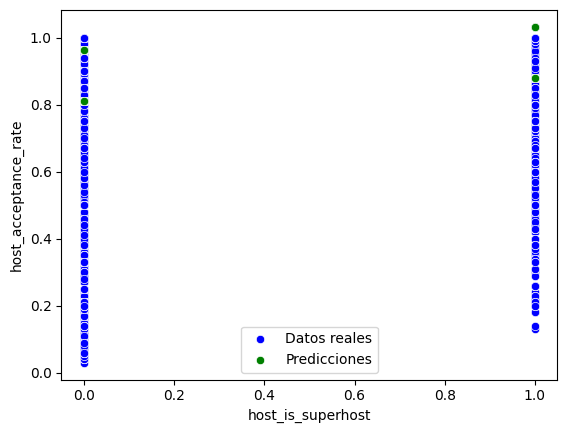

In [237]:
sns.scatterplot(x='host_is_superhost', y='host_acceptance_rate', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="green", data=df_milan, label='Predicciones')


In [238]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter



0.21174146938385763

In [239]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.4601537453763227

**host_id**

In [240]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_milan[['instant_bookable', 'host_total_listings_count']]
Var_Dep= df_milan['host_id']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

y_pred= model.predict(X=df_milan[['instant_bookable', 'host_total_listings_count']])

df_milan.insert(0, 'Predicciones1', y_pred)

<Axes: xlabel='instant_bookable', ylabel='host_id'>

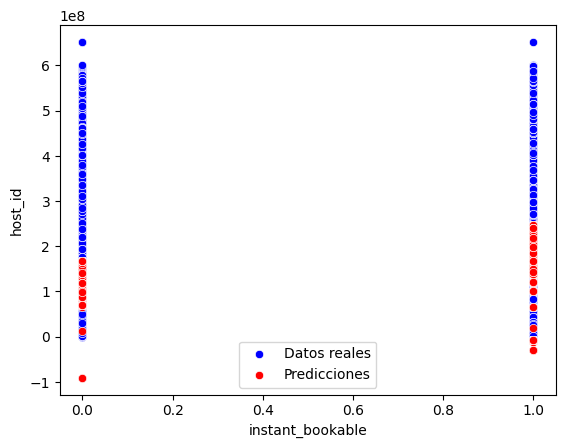

In [241]:
sns.scatterplot(x='instant_bookable', y='host_id', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='instant_bookable', y='Predicciones1', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='host_total_listings_count', ylabel='host_id'>

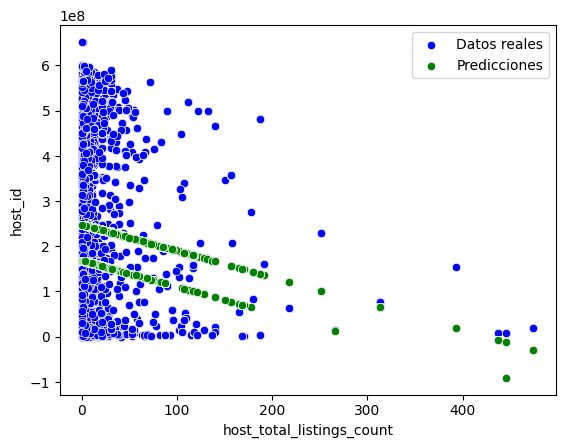

In [242]:
sns.scatterplot(x='host_total_listings_count', y='host_id', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='host_total_listings_count', y='Predicciones1', color="green", data=df_milan, label='Predicciones')

In [243]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)

print(f"Coeficiente de correlación: {coef_Deter}")
print(f"Coeficiente de determinacion: {coef_Correl}")

Coeficiente de correlación: 0.056672506024694536
Coeficiente de determinacion: 0.23805987907393075


**host_is_superhost**

In [244]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_milan[['host_response_rate', 'host_acceptance_rate', 'number_of_reviews']]
Var_Dep= df_milan['host_is_superhost']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

y_pred= model.predict(X=df_milan[['host_response_rate', 'host_acceptance_rate', 'number_of_reviews']])

df_milan.insert(0, 'Predicciones2', y_pred)

<Axes: xlabel='host_response_rate', ylabel='host_is_superhost'>

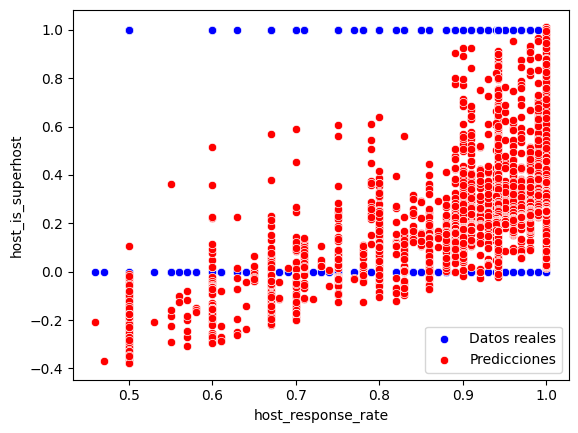

In [245]:
sns.scatterplot(x='host_response_rate', y='host_is_superhost', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='host_response_rate', y='Predicciones2', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='host_acceptance_rate', ylabel='host_is_superhost'>

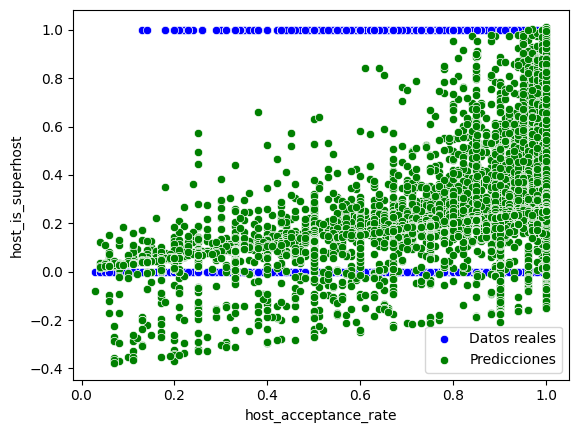

In [246]:
sns.scatterplot(x='host_acceptance_rate', y='host_is_superhost', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="green", data=df_milan, label='Predicciones')

<Axes: xlabel='number_of_reviews', ylabel='host_is_superhost'>

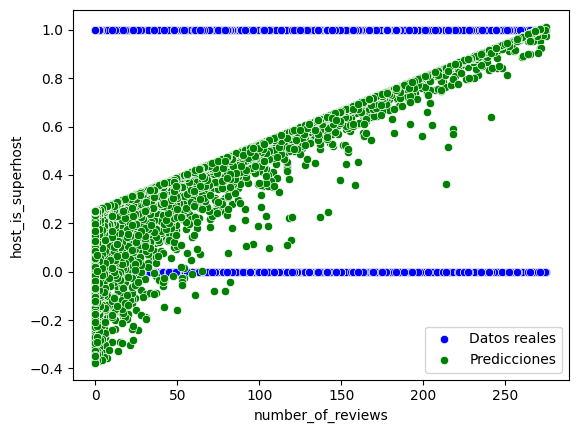

In [247]:
sns.scatterplot(x='number_of_reviews', y='host_is_superhost', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='number_of_reviews', y='Predicciones2', color="green", data=df_milan, label='Predicciones')

In [248]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)

print(f"Coeficiente de correlación: {coef_Deter}")
print(f"Coeficiente de determinacion: {coef_Correl}")

Coeficiente de correlación: 0.12296516550597092
Coeficiente de determinacion: 0.3506638925038775


**host_total_listings_count**

In [249]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_milan[['host_listings_count', 'review_scores_communication']]
Var_Dep= df_milan['host_total_listings_count']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

y_pred= model.predict(X=df_milan[['host_listings_count', 'review_scores_communication']])

df_milan.insert(0, 'Predicciones3', y_pred)

<Axes: xlabel='host_listings_count', ylabel='host_total_listings_count'>

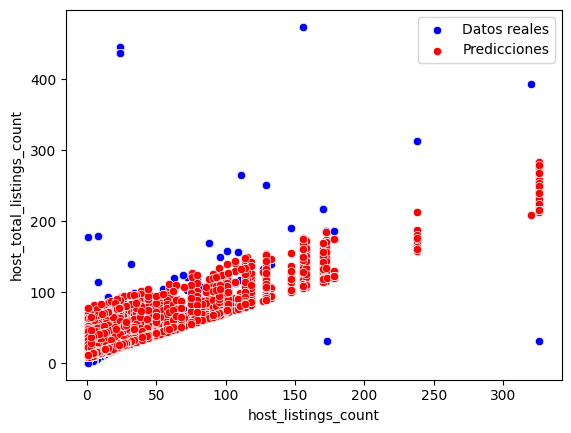

In [250]:
sns.scatterplot(x='host_listings_count', y='host_total_listings_count', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='host_listings_count', y='Predicciones3', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='review_scores_communication', ylabel='host_total_listings_count'>

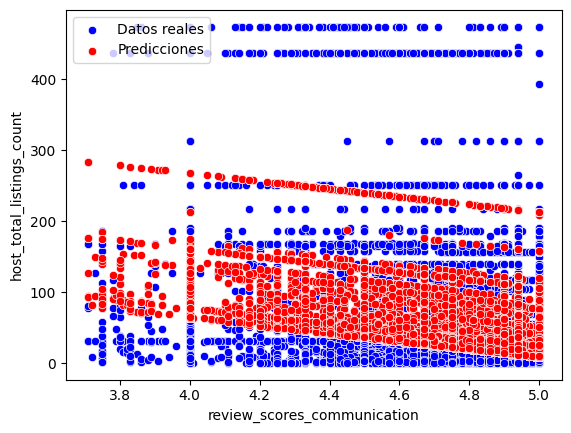

In [251]:
sns.scatterplot(x='review_scores_communication', y='host_total_listings_count', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='review_scores_communication', y='Predicciones3', color="red", data=df_milan, label='Predicciones')

In [252]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)

print(f"Coeficiente de correlación: {coef_Deter}")
print(f"Coeficiente de determinacion: {coef_Correl}")

Coeficiente de correlación: 0.2688257394149274
Coeficiente de determinacion: 0.5184840782655986


**room_type**

In [253]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_milan[['property_type', 'accommodates']]
Var_Dep= df_milan['room_type']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

y_pred= model.predict(X=df_milan[['property_type', 'accommodates']])

df_milan.insert(0, 'Predicciones4', y_pred)

<Axes: xlabel='property_type', ylabel='room_type'>

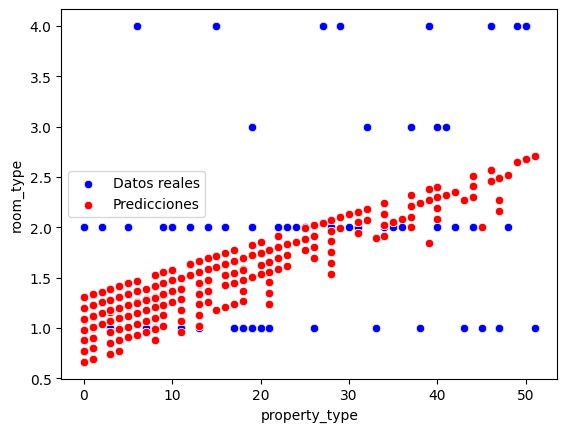

In [254]:
sns.scatterplot(x='property_type', y='room_type', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='property_type', y='Predicciones4', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='accommodates', ylabel='room_type'>

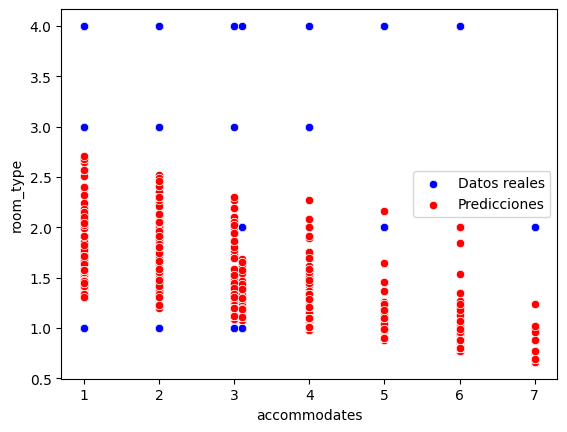

In [255]:
sns.scatterplot(x='accommodates', y='room_type', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='accommodates', y='Predicciones4', color="red", data=df_milan, label='Predicciones')

In [256]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)

print(f"Coeficiente de correlación: {coef_Deter}")
print(f"Coeficiente de determinacion: {coef_Correl}")

Coeficiente de correlación: 0.21216427490868006
Coeficiente de determinacion: 0.46061293393551167


**accommodates**

In [257]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_milan[['room_type', 'beds', 'bathrooms']]
Var_Dep= df_milan['accommodates']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

y_pred= model.predict(X=df_milan[['room_type', 'beds', 'bathrooms']])

df_milan.insert(0, 'Predicciones5', y_pred)

<Axes: xlabel='room_type', ylabel='accommodates'>

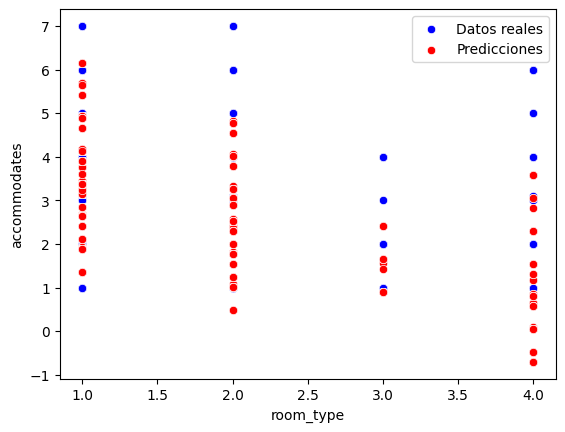

In [258]:
sns.scatterplot(x='room_type', y='accommodates', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='room_type', y='Predicciones5', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='beds', ylabel='accommodates'>

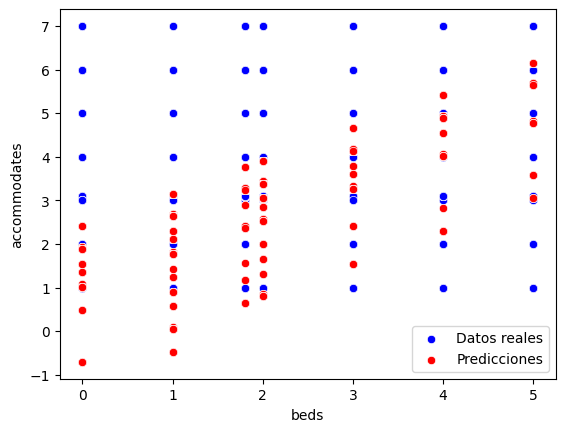

In [259]:
sns.scatterplot(x='beds', y='accommodates', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='beds', y='Predicciones5', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='bathrooms', ylabel='accommodates'>

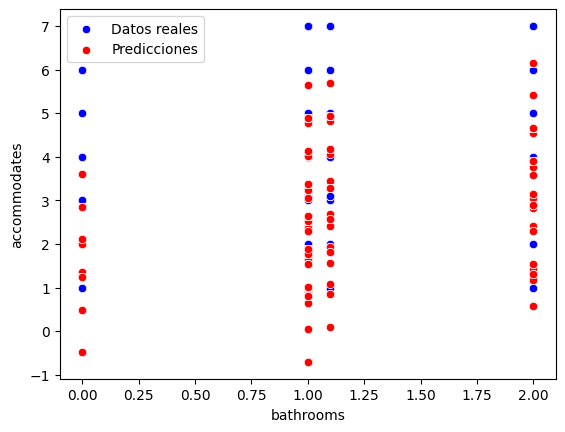

In [260]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='bathrooms', y='Predicciones5', color="red", data=df_milan, label='Predicciones')

In [261]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)

print(f"Coeficiente de correlación: {coef_Deter}")
print(f"Coeficiente de determinacion: {coef_Correl}")

Coeficiente de correlación: 0.4590644446800449
Coeficiente de determinacion: 0.6775429467421566


**bedrooms**


In [262]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_milan[['beds', 'accommodates']]
Var_Dep= df_milan['bedrooms']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

y_pred= model.predict(X=df_milan[['beds', 'accommodates']])

df_milan.insert(0, 'Predicciones6', y_pred)

<Axes: xlabel='beds', ylabel='bedrooms'>

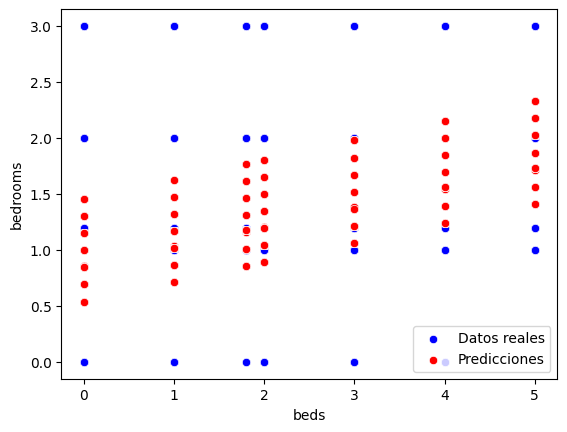

In [263]:
sns.scatterplot(x='beds', y='bedrooms', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='beds', y='Predicciones6', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='accommodates', ylabel='bedrooms'>

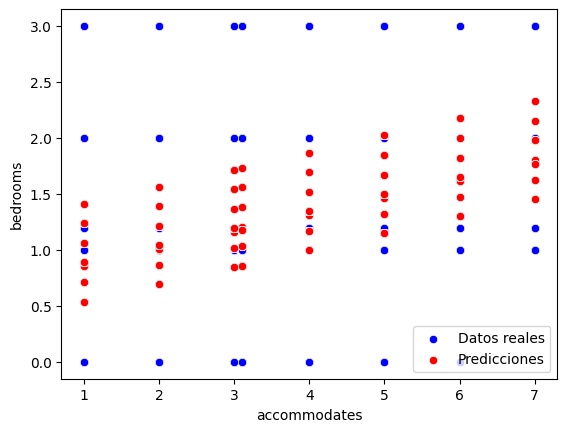

In [264]:
sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='accommodates', y='Predicciones6', color="red", data=df_milan, label='Predicciones')

In [265]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)

print(f"Coeficiente de correlación: {coef_Deter}")
print(f"Coeficiente de determinacion: {coef_Correl}")

Coeficiente de correlación: 0.3285878012302612
Coeficiente de determinacion: 0.573225785559461


**price**

In [266]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_milan[['beds', 'bedrooms', 'bathrooms']]
Var_Dep= df_milan['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

y_pred= model.predict(X=df_milan[['beds', 'bedrooms', 'bathrooms']])

df_milan.insert(0, 'Predicciones7', y_pred)

<Axes: xlabel='bathrooms', ylabel='price'>

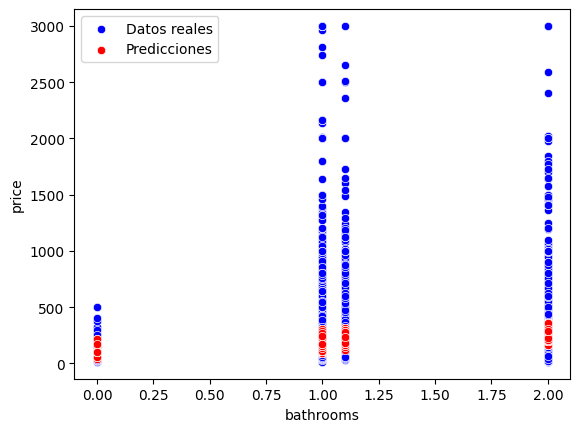

In [267]:
sns.scatterplot(x='bathrooms', y='price', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='bathrooms', y='Predicciones7', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='beds', ylabel='price'>

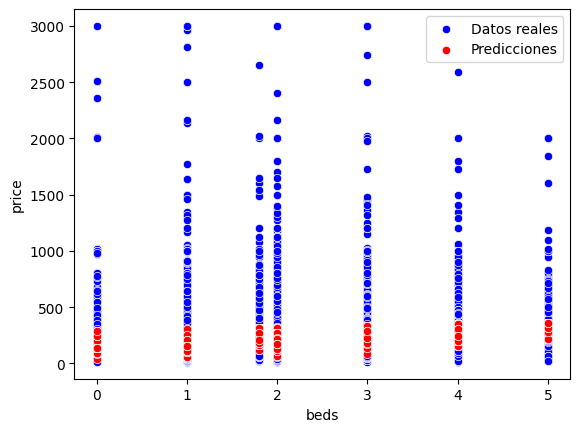

In [268]:
sns.scatterplot(x='beds', y='price', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='beds', y='Predicciones7', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='bedrooms', ylabel='price'>

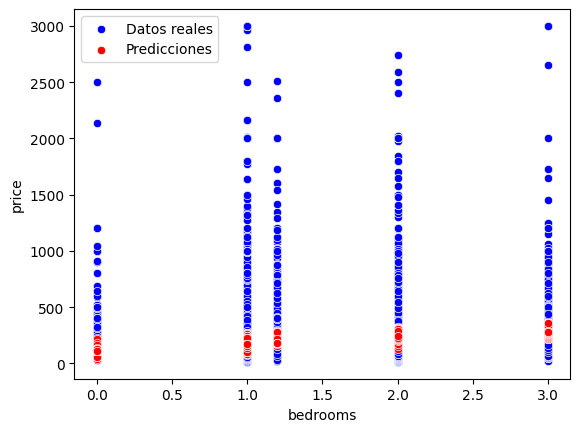

In [269]:
sns.scatterplot(x='bedrooms', y='price', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='bedrooms', y='Predicciones7', color="red", data=df_milan, label='Predicciones')

In [270]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)

print(f"Coeficiente de correlación: {coef_Deter}")
print(f"Coeficiente de determinacion: {coef_Correl}")

Coeficiente de correlación: 0.06808538713584722
Coeficiente de determinacion: 0.2609317672033193


**review_scores_value**

In [272]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_milan[['review_scores_rating', 'review_scores_accuracy']]
Var_Dep= df_milan['review_scores_value']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

y_pred= model.predict(X=df_milan[['review_scores_rating', 'review_scores_accuracy']])

df_milan.insert(0, 'Predicciones8', y_pred)

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

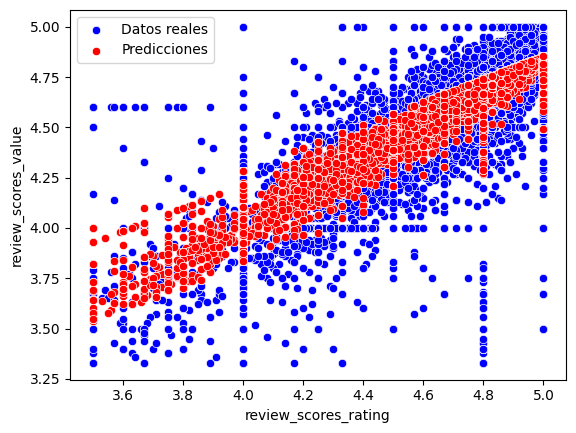

In [273]:
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='review_scores_rating', y='Predicciones8', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='review_scores_accuracy', ylabel='review_scores_value'>

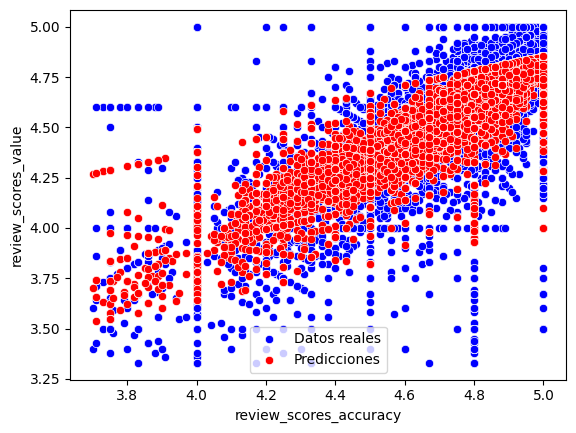

In [274]:
sns.scatterplot(x='review_scores_accuracy', y='review_scores_value', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='review_scores_accuracy', y='Predicciones8', color="red", data=df_milan, label='Predicciones')

In [275]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)

print(f"Coeficiente de correlación: {coef_Deter}")
print(f"Coeficiente de determinacion: {coef_Correl}")

Coeficiente de correlación: 0.5527616762734245
Coeficiente de determinacion: 0.7434794390387838


**instant_bookable**

In [276]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df_milan[['host_acceptance_rate', 'host_listings_count']]
Var_Dep= df_milan['instant_bookable']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

y_pred= model.predict(X=df_milan[['host_acceptance_rate', 'host_listings_count']])

df_milan.insert(0, 'Predicciones9', y_pred)

<Axes: xlabel='host_acceptance_rate', ylabel='instant_bookable'>

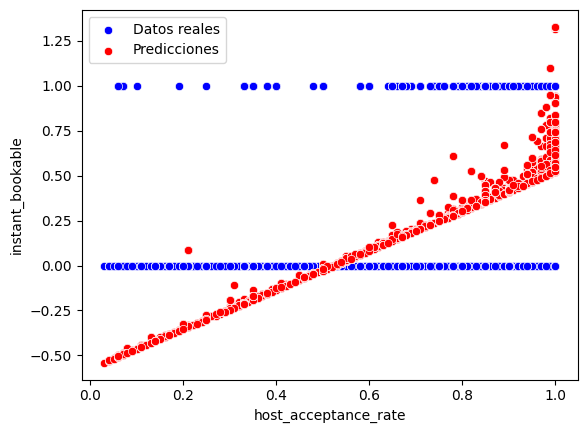

In [277]:
sns.scatterplot(x='host_acceptance_rate', y='instant_bookable', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='host_acceptance_rate', y='Predicciones9', color="red", data=df_milan, label='Predicciones')

<Axes: xlabel='host_listings_count', ylabel='instant_bookable'>

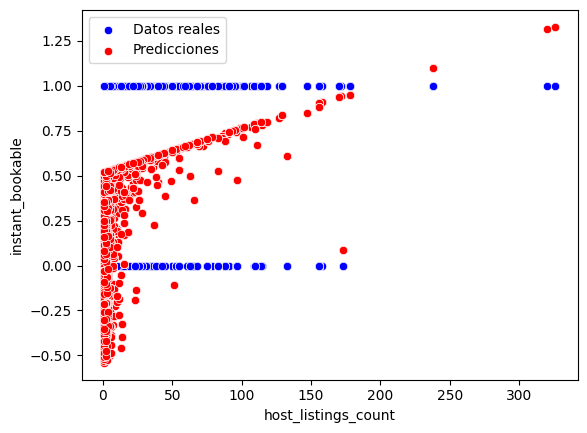

In [278]:
sns.scatterplot(x='host_listings_count', y='instant_bookable', color="blue", data=df_milan, label='Datos reales')
sns.scatterplot(x='host_listings_count', y='Predicciones9', color="red", data=df_milan, label='Predicciones')

In [279]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)

print(f"Coeficiente de correlación: {coef_Deter}")
print(f"Coeficiente de determinacion: {coef_Correl}")

Coeficiente de correlación: 0.244499752690032
Coeficiente de determinacion: 0.4944691625268779
